# 필요한 라이브러리 import

In [1]:
import numpy as np
import pandas as pd

In [2]:
filename='iris.csv'

In [3]:
#importing flat files with pandas-R의 dataframe과 유사,excel과 유사 - numpy로도 가능하지만 array형식이어서,
# pandas 형태로 불러들이는 것이 데이터 핸들링에 편하다 (칼럼명도 나와있고)

In [4]:
filename='iris.csv'
data= pd.read_csv(filename)

In [5]:
# 처음 5개 행만 확인
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# 1. K-means Clustering

In [9]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

In [10]:
# 위에서 불러들인 아이리스 데이터(data)에서, 클러스터링에 쓸 변수만 추출
iris_SP = data[['sepal.length','sepal.width','petal.length','petal.width']]
iris_SP.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
iris_SP.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# k-means cluster analysis for 1-15 clusters                                              
from scipy.spatial.distance import cdist
clusters=range(1,15)
meandist=[]

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

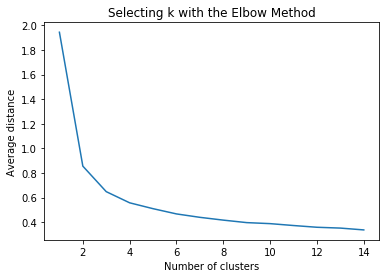

In [13]:
# k-means cluster analysis for 1-15 clusters                                              
from scipy.spatial.distance import cdist
import matplotlib.pylab as plt
clusters=range(1,15)
meandist=[]

# loop through each cluster and fit the model to the train set
# generate the predicted cluster assingment and append the mean 
# distance my taking the sum divided by the shape
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(iris_SP)
    clusassign=model.predict(iris_SP)
    meandist.append(sum(np.min(cdist(iris_SP, model.cluster_centers_, 'euclidean'), axis=1))
    / iris_SP.shape[0])

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose

x축이 cluster 갯수, y축이 SSE: 각 점들이 할당되는 클러스터의 CENTROID까지의 거리를 모든 포인트에 대해 합한것
- 이것이 적을수록 좋은 것인데, ELBOW POINT란 이 Y 축이 딱 꺾이는 점 혹은 그 이후 값을 좋은 CLUSTER 갯수로 택한다.

"""
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') 
# pick the fewest number of clusters that reduces the average distance
# If you observe after 3 we can see graph is almost linear

In [14]:
# create a model object with 3 clusters
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# http://scikit-learn.org/stable/modules/clustering.html#k-means
model = KMeans(n_clusters=3)
model.fit(iris_SP)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [17]:
#원래 data에 kmeans clustering 결과 column 추가
data['predictedY'] = model.labels_

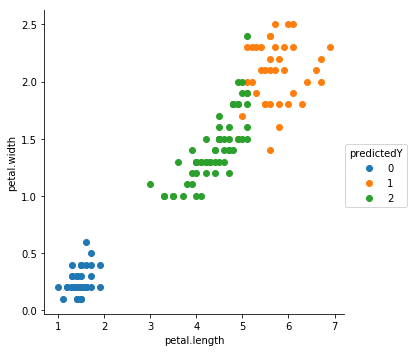

In [21]:
# K-means 결과 3개 Cluster 할당된 것 시각화
import matplotlib.pyplot as plt #Visualize 
sns.FacetGrid(data, hue="predictedY", size=5) \
   .map(plt.scatter, "petal.length", "petal.width") \
   .add_legend()

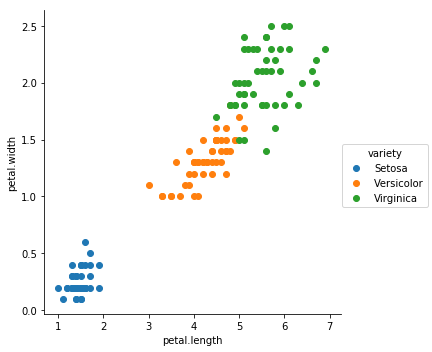

In [22]:
# 실제 label 을 이용한 시각화- 0과 Setosa, 1과 Versicolor, 2와 Virginica가 매칭되는것을
# 알수있다.
import seaborn as sns;
import matplotlib.pyplot as plt #Visualize 
sns.FacetGrid(data, hue="variety", size=5) \
   .map(plt.scatter, "petal.length", "petal.width") \
   .add_legend()

In [23]:
# calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

In [24]:
# generate the linkage matrix- 여러 연결법(single,complete,...) 중 ward method 선택
Z = linkage(iris_SP, 'ward') #ward method

In [25]:
# maximum distance 7.08을 기준으로 clustering 자르겠다 - 이 정도면 cluster들끼리 충분히 차이난다는 주관적인 기준 
max_d = 7.08

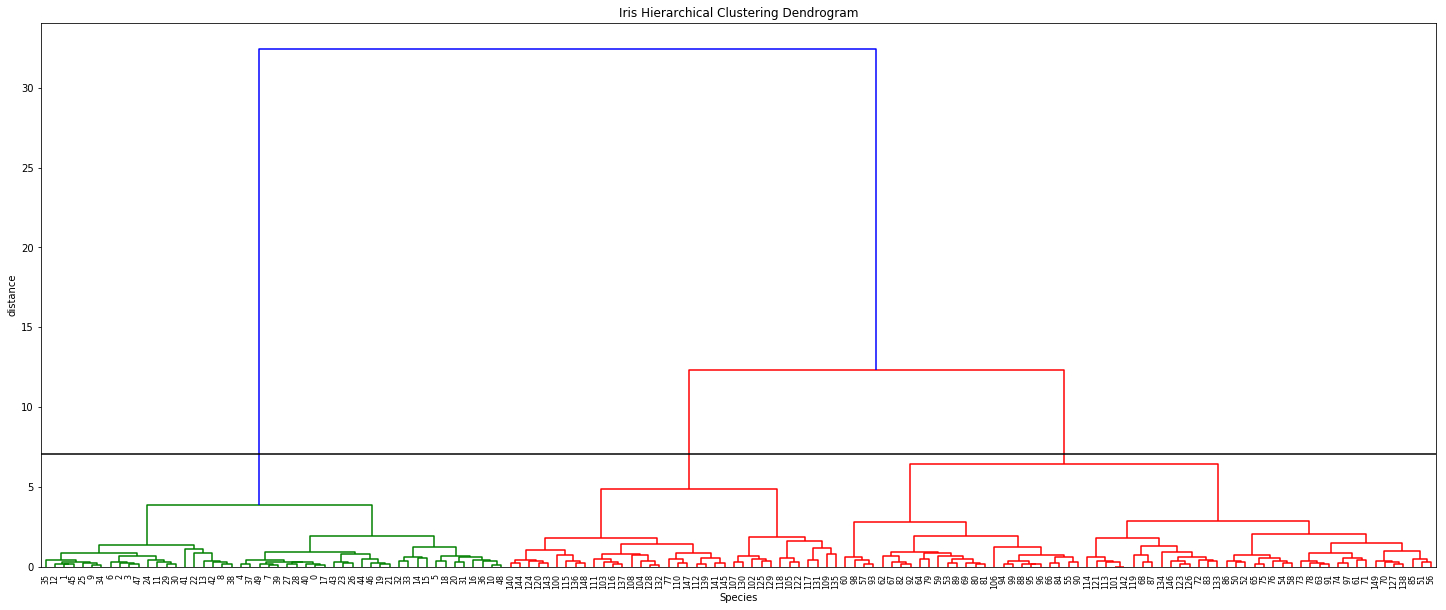

In [26]:
# truncate_mode 등은 그냥 dendrogram 보기 좋게 만들어주는 옵션 
plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

In [27]:
from scipy.cluster.hierarchy import fcluster

#위에서 정한 distance=7.08 (dendrogram 검은색 선) 기준으로 병합적 clustering 자르기 -> 최종  Cluster 3개 가 나옴 
predict = pd.DataFrame(fcluster(Z,7.08,criterion='distance'))
predict.columns=['predict']
ct = pd.crosstab(predict['predict'],data['variety'])
print(ct)

variety  Setosa  Versicolor  Virginica
predict                               
1            50           0          0
2             0           1         35
3             0          49         15


In [29]:
#원래 data에 Hierarchical clustering 결과 column 추가
data['HierY']= predict

In [30]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,predictedY,HierY
0,5.1,3.5,1.4,0.2,Setosa,0,1
1,4.9,3.0,1.4,0.2,Setosa,0,1
2,4.7,3.2,1.3,0.2,Setosa,0,1
3,4.6,3.1,1.5,0.2,Setosa,0,1
4,5.0,3.6,1.4,0.2,Setosa,0,1


In [31]:
ct = pd.crosstab(data['predictedY'],data['variety'])
print(ct)

variety     Setosa  Versicolor  Virginica
predictedY                               
0               50           0          0
1                0           2         36
2                0          48         14


In [32]:
ct = pd.crosstab(data['HierY'],data['variety'])
print(ct)

variety  Setosa  Versicolor  Virginica
HierY                                 
1            50           0          0
2             0           1         35
3             0          49         15


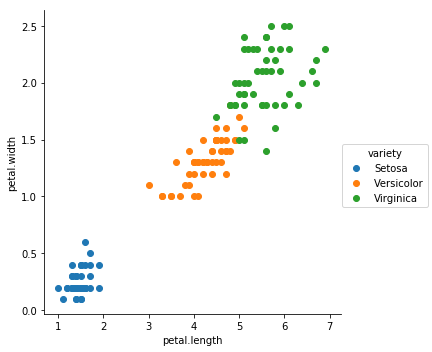

In [33]:
# 그림1. 실제 label
import matplotlib.pyplot as plt #Visualize 
sns.FacetGrid(data, hue="variety", size=5) \
   .map(plt.scatter, "petal.length", "petal.width") \
   .add_legend()

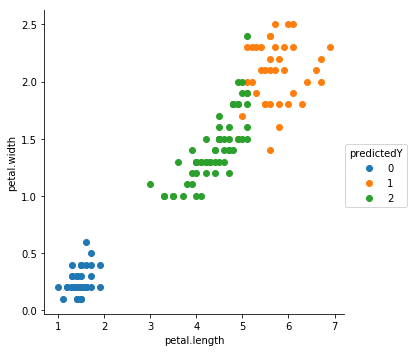

In [34]:
#  그림2. 계층적 군집분석 결과
import matplotlib.pyplot as plt #Visualize 
sns.FacetGrid(data, hue="predictedY", size=5) \
   .map(plt.scatter, "petal.length", "petal.width") \
   .add_legend()

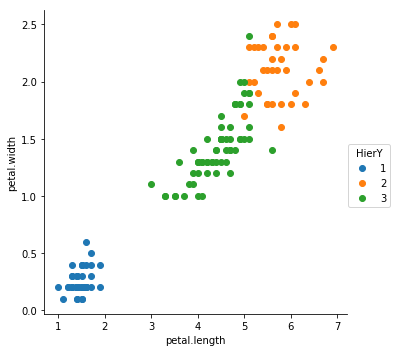

In [35]:
# 그림3. K-means 군집분석 결과 
import matplotlib.pyplot as plt #Visualize 
sns.FacetGrid(data, hue="HierY", size=5) \
   .map(plt.scatter, "petal.length", "petal.width") \
   .add_legend()